## Import the necessary library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Import the dataset:

In [2]:
data=pd.read_csv('data.csv',encoding='latin1')

### The UnicodeDecodeError occurs because the file is not encoded in UTF-8, and Python is unable to interpret certain byte sequences as valid UTF-8 characters. Fix it by specifying the correct encoding (e.g., 'latin1', 'cp1252', or 'utf-16') when reading the file.

In [241]:
data.shape

(541909, 3)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.drop(['InvoiceNo'],axis=1,inplace=True)

In [5]:
data.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.StockCode.unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [7]:
data.StockCode.value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [9]:
data['InvoiceDate'].str.split('/')

0          [12, 1, 2010 8:26]
1          [12, 1, 2010 8:26]
2          [12, 1, 2010 8:26]
3          [12, 1, 2010 8:26]
4          [12, 1, 2010 8:26]
                 ...         
541904    [12, 9, 2011 12:50]
541905    [12, 9, 2011 12:50]
541906    [12, 9, 2011 12:50]
541907    [12, 9, 2011 12:50]
541908    [12, 9, 2011 12:50]
Name: InvoiceDate, Length: 541909, dtype: object

In [10]:
data['Invoice_Date']=data['InvoiceDate'].str.split('/').str[0]
data['Invoice_Date']

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: Invoice_Date, Length: 541909, dtype: object

In [11]:
data.Invoice_Date.value_counts()

Invoice_Date
11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: count, dtype: int64

In [12]:
data['Invoice_Day']=data['InvoiceDate'].str.split('/').str[1]
data['Invoice_Day']

0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: Invoice_Day, Length: 541909, dtype: object

In [13]:
data['Invoice_year']=data['InvoiceDate'].str.split('/').replace(['8:26'],' ').str[2]
data['Invoice_Year']=data['Invoice_year'].str.split(' ').str[0]
data['Invoice_Year']

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: Invoice_Year, Length: 541909, dtype: object

In [14]:
data['Invoice_hour']=pd.to_datetime(data['Invoice_year']).dt.hour

In [15]:
data['Invoice_minute']=pd.to_datetime(data['Invoice_year']).dt.minute

In [16]:
data.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Day,Invoice_year,Invoice_Year,Invoice_hour,Invoice_minute
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010 8:26,2010,8,26
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,2010 8:26,2010,8,26
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,2010 8:26,2010,8,26
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,2010 8:26,2010,8,26
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,2010 8:26,2010,8,26


In [17]:
## Now drop the Invoice date:
data.drop(['InvoiceDate','Invoice_year'],axis=1,inplace=True)

In [18]:
data.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Day,Invoice_Year,Invoice_hour,Invoice_minute
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12,1,2010,8,26
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12,1,2010,8,26
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12,1,2010,8,26
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12,1,2010,8,26
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12,1,2010,8,26


In [19]:
data.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [20]:
data.isnull().sum()

StockCode              0
Description         1454
Quantity               0
UnitPrice              0
CustomerID        135080
Country                0
Invoice_Date           0
Invoice_Day            0
Invoice_Year           0
Invoice_hour           0
Invoice_minute         0
dtype: int64

In [21]:
data.drop(['CustomerID','Description'],axis=1,inplace=True)

In [22]:
data.head()

,StockCode,Quantity,UnitPrice,Country,Invoice_Date,Invoice_Day,Invoice_Year,Invoice_hour,Invoice_minute
0,85123A,6,2.55,United Kingdom,12,1,2010,8,26
1,71053,6,3.39,United Kingdom,12,1,2010,8,26
2,84406B,8,2.75,United Kingdom,12,1,2010,8,26
3,84029G,6,3.39,United Kingdom,12,1,2010,8,26
4,84029E,6,3.39,United Kingdom,12,1,2010,8,26


In [23]:
data.StockCode.value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

## Feature Encoding:

In [24]:
## Use the Label Encoder:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
data['country']=le.fit_transform(data['Country'])
data['country']

0         36
1         36
2         36
3         36
4         36
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Name: country, Length: 541909, dtype: int32

In [26]:
data['stock_code']=le.fit_transform(data['StockCode'])
data['stock_code']

0         3536
1         2794
2         3044
3         2985
4         2984
          ... 
541904    1527
541905    1803
541906    2145
541907    2146
541908    1093
Name: stock_code, Length: 541909, dtype: int32

In [27]:
data.head()

,StockCode,Quantity,UnitPrice,Country,Invoice_Date,Invoice_Day,Invoice_Year,Invoice_hour,Invoice_minute,country,stock_code
0,85123A,6,2.55,United Kingdom,12,1,2010,8,26,36,3536
1,71053,6,3.39,United Kingdom,12,1,2010,8,26,36,2794
2,84406B,8,2.75,United Kingdom,12,1,2010,8,26,36,3044
3,84029G,6,3.39,United Kingdom,12,1,2010,8,26,36,2985
4,84029E,6,3.39,United Kingdom,12,1,2010,8,26,36,2984


In [28]:
data.drop(['StockCode','Country'],axis=1,inplace=True)

In [29]:
data.head()

,Quantity,UnitPrice,Invoice_Date,Invoice_Day,Invoice_Year,Invoice_hour,Invoice_minute,country,stock_code
0,6,2.55,12,1,2010,8,26,36,3536
1,6,3.39,12,1,2010,8,26,36,2794
2,8,2.75,12,1,2010,8,26,36,3044
3,6,3.39,12,1,2010,8,26,36,2985
4,6,3.39,12,1,2010,8,26,36,2984


In [99]:
data.stock_code.value_counts()

stock_code
3536    2313
1348    2203
3515    2159
2733    1727
180     1639
        ... 
608        1
1214       1
82         1
3962       1
2835       1
Name: count, Length: 4070, dtype: int64

In [100]:
data.drop(['stock_code'],axis=1,inplace=True)

In [174]:
data.columns

Index(['Quantity', 'UnitPrice', 'Invoice_Date', 'Invoice_Day', 'Invoice_Year',
       'Invoice_hour', 'Invoice_minute', 'country'],
      dtype='object')

In [175]:
data.drop(['Invoice_Day','Invoice_Year','Invoice_hour'],axis=1,inplace=True)

In [203]:
data.drop(['Invoice_minute','Invoice_Date'],axis=1,inplace=True)

## Feature Scaling:

In [204]:
## Now use the standardization :
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=MinMaxScaler()
df=scale.fit_transform(data)
df

array([[0.50003704, 0.2211504 , 0.97297297],
       [0.50003704, 0.22116719, 0.97297297],
       [0.50004939, 0.2211544 , 0.97297297],
       ...,
       [0.50002469, 0.22118238, 0.35135135],
       [0.50002469, 0.22118238, 0.35135135],
       [0.50001852, 0.22119837, 0.35135135]])

In [205]:
df1=pd.DataFrame(df,columns=data.columns)
df1.head()

,Quantity,UnitPrice,country
0,0.500037,0.221150,0.972973
1,0.500037,0.221167,0.972973
2,0.500049,0.221154,0.972973
3,0.500037,0.221167,0.972973
4,0.500037,0.221167,0.972973


## Model:

In [206]:
## Use the KMeans Models:
from sklearn.cluster import KMeans


In [207]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)  

In [210]:
wcss

[15331.60218369894,
 986.5748288847169,
 485.6436456387393,
 199.29710005321613,
 133.20271933533937,
 68.45328500264738,
 40.43280096727524,
 28.84647158112744,
 22.609869973049765]

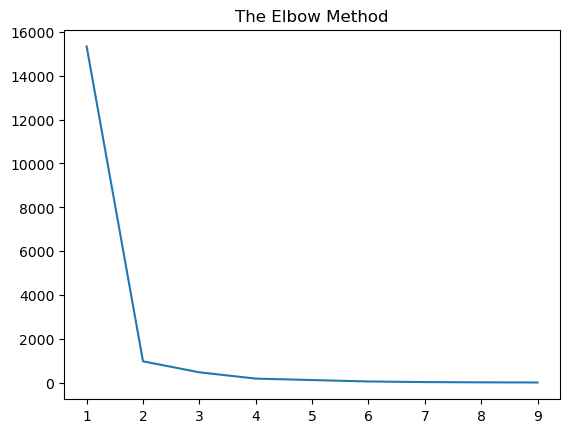

In [212]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')

plt.show()

In [213]:
cluster=KMeans(n_clusters=2,random_state=42)
cluster.fit(df1)

KMeans(n_clusters=2, random_state=42)

In [214]:
cluster_labels=cluster.labels_
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [215]:
from collections import Counter

In [216]:
Counter(cluster_labels)

Counter({0: 506894, 1: 35015})

In [217]:
from sklearn.metrics import silhouette_score

In [218]:
score=silhouette_score(df1.loc[:,'Quantity':],cluster_labels,sample_size=50000)
score

0.973166131619962

In [222]:
df1['labels']=cluster_labels
df1.head()

,Quantity,UnitPrice,country,Performance,labels
0,0.500037,0.221150,0.972973,NaN,0
1,0.500037,0.221167,0.972973,NaN,0
2,0.500049,0.221154,0.972973,NaN,0
3,0.500037,0.221167,0.972973,NaN,0
4,0.500037,0.221167,0.972973,NaN,0


In [223]:
df1['Performance']=0
df1.loc[df1.labels==0,'Performance']='good'
df1.loc[df1.labels==1,'Performance']='bad'

In [225]:
df1

,Quantity,UnitPrice,country,Performance,labels
0,0.500037,0.221150,0.972973,good,0
1,0.500037,0.221167,0.972973,good,0
2,0.500049,0.221154,0.972973,good,0
3,0.500037,0.221167,0.972973,good,0
4,0.500037,0.221167,0.972973,good,0
...,...,...,...,...,...
541904,0.500074,0.221116,0.351351,bad,1
541905,0.500037,0.221141,0.351351,bad,1
541906,0.500025,0.221182,0.351351,bad,1
541907,0.500025,0.221182,0.351351,bad,1


<Axes: xlabel='country', ylabel='Performance'>

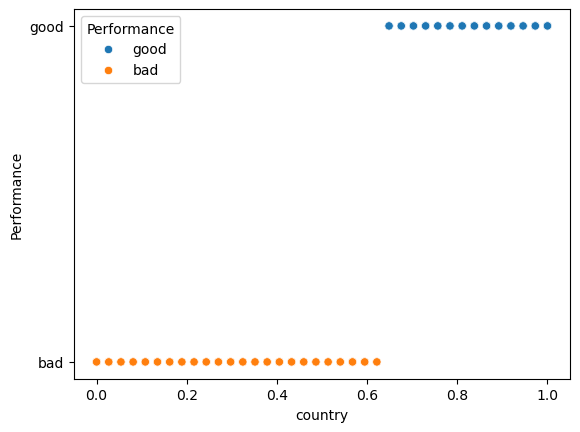

In [229]:
sns.scatterplot(x='country',y='Performance',hue='Performance',data=df1)

<Axes: xlabel='UnitPrice', ylabel='Performance'>

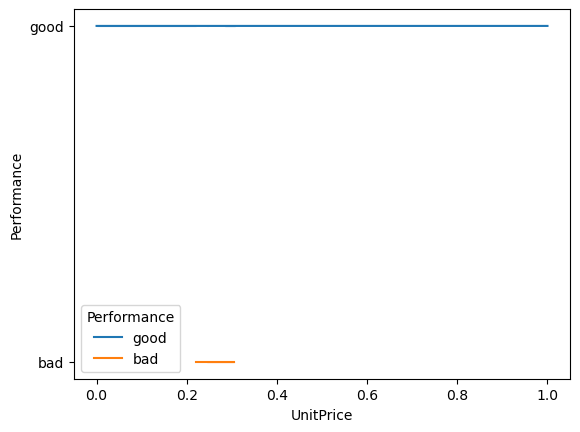

In [233]:
sns.lineplot(x='UnitPrice',y='Performance',hue='Performance',data=df1)

<Axes: xlabel='country', ylabel='UnitPrice'>

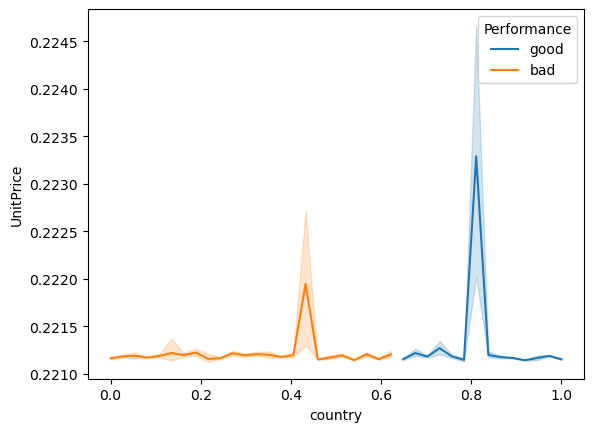

In [237]:
sns.lineplot(x='country',y='UnitPrice',hue='Performance',data=df1)

In [239]:
df1.loc[df1.country>0.7]

,Quantity,UnitPrice,country,Performance,labels
0,0.500037,0.221150,0.972973,good,0
1,0.500037,0.221167,0.972973,good,0
2,0.500049,0.221154,0.972973,good,0
3,0.500037,0.221167,0.972973,good,0
4,0.500037,0.221167,0.972973,good,0
...,...,...,...,...,...
541889,0.500074,0.221138,0.972973,good,0
541890,0.500049,0.221158,0.972973,good,0
541891,0.500148,0.221124,0.972973,good,0
541892,0.500148,0.221278,0.972973,good,0


In [240]:
df1.loc[df1.country<0.7]

,Quantity,UnitPrice,country,Performance,labels
26,0.500148,0.221174,0.351351,bad,1
27,0.500148,0.221174,0.351351,bad,1
28,0.500074,0.221174,0.351351,bad,1
29,0.500074,0.221116,0.351351,bad,1
30,0.500148,0.221112,0.351351,bad,1
...,...,...,...,...,...
541904,0.500074,0.221116,0.351351,bad,1
541905,0.500037,0.221141,0.351351,bad,1
541906,0.500025,0.221182,0.351351,bad,1
541907,0.500025,0.221182,0.351351,bad,1


## Conclusion:
#### 1.503437 Countries are Good Performance.
#### 2.38472 Countries are Bad Performace.